# Задание 1 «Работа троллейбусов»
В «Могортранс» поступила жалоба от пассажиров на плохую работу транспорта на диспетчерской станции «Черемушки» в период с 20:00 до 21:00. 
Суть жалобы состоит в том, что троллейбусы ходят не по расписанию и их приходится ждать очень долго на остановках. 
На предприятии «Мосгортранс» существует система регистрации времени прибытия троллейбусов, а также подсчета количества прибывших пассажиров на этих троллейбусах. 
Данные с системы регистрации 	приведены в файле “Статистика по троллейбусам”. Руководство предприятия поручило вам разобраться в ситуации и выяснить, чем же вызвана жалоба, а также провести развернутый анализ времени 
движения транспорта и пассажиропотока.
Требуется:
1)найти причину жалобы, 
2) выяснить характеристики, которыми характеризуется движение транспорта и пассажиропоток (числовые, графические, как по отдельным маршрутам троллейбусов, так и в совокупности) 

In [1]:
import pandas as pd
from pandas import  to_datetime
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Traffic.csv',encoding='cp1251')
print( 'Число уникальных номеров троллейбусов -', len(df['Номер троллейбуса'].unique()))
print('Это -', df['Номер троллейбуса'].unique())
#df[df['Номер троллейбуса']==31]['Количество человек'].mean()

Число уникальных номеров троллейбусов - 3
Это - [31 51 27]


>Исследуем три маршрута 31,51,27

>А теперь посмотрим, сколько человек в среднем ожидают каждый из автобусов.

In [3]:
a = df['Номер троллейбуса'].unique()
for i in range(len(a)):
    print('Среднее число человек ожидающих номер автобуса', a[i],'-', df[df['Номер троллейбуса']==a[i]]['Количество человек'].mean())

Среднее число человек ожидающих номер автобуса 31 - 14.0
Среднее число человек ожидающих номер автобуса 51 - 15.0
Среднее число человек ожидающих номер автобуса 27 - 10.0


> 27 маршрут не самый популярный

> 51 наиболее загруженный

In [4]:
a = df['Номер троллейбуса'].unique()
for i in range(len(a)):
    print('Среднееквадратичный разброс количества человек ожидающих номер автобуса', a[i],'-', df[df['Номер троллейбуса']==a[i]]['Количество человек'].std())

Среднееквадратичный разброс количества человек ожидающих номер автобуса 31 - 5.39135109844
Среднееквадратичный разброс количества человек ожидающих номер автобуса 51 - 4.89897948557
Среднееквадратичный разброс количества человек ожидающих номер автобуса 27 - 5.03322295685


>Преобразуем переменную Время прибытия

In [5]:
df['TimeSplit'] = df['Время прибытия'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))-1200
df.head()

,Номер троллейбуса,Время прибытия,Количество человек,TimeSplit
0,31,20:00,24,0
1,51,20:00,20,0
2,27,20:01,20,1
3,31,20:03,23,3
4,27,20:05,15,5


In [6]:
c1 = (df['Номер троллейбуса']==31)
c2 = (df['Номер троллейбуса']==51)
c3 = (df['Номер троллейбуса']==27)

## Рассмотрим наглядно пассажиропоток

Text(0.5,1,'Пассажиропоток')

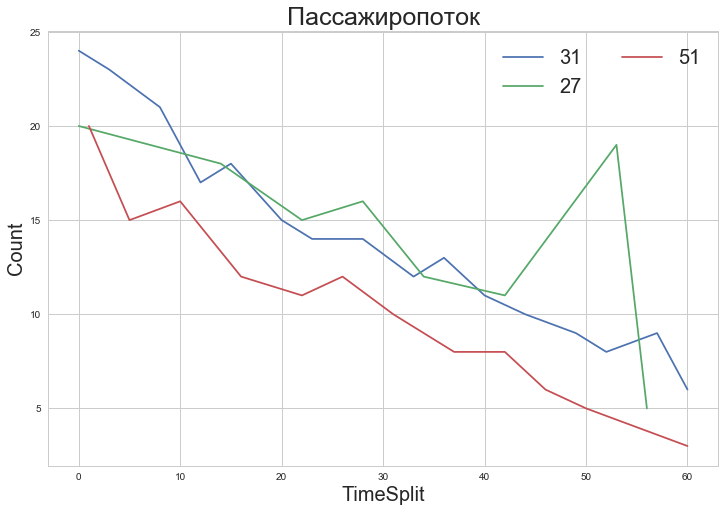

In [7]:
sns.set()
rcParams['figure.figsize'] = 12,8
sns.set_style("whitegrid")
plt.plot(df[c1]['TimeSplit'], df[c1]['Количество человек'])
plt.legend('A', ncol=2, loc='upper right')
plt.plot(df[c2]['TimeSplit'], df[c2]['Количество человек'])
plt.legend('B', ncol=2, loc='upper right')
plt.plot(df[c3]['TimeSplit'], df[c3]['Количество человек'])
plt.legend(['31', '27', '51'], ncol=2, loc='upper right',fontsize=20 )   
plt.xlabel('TimeSplit', fontsize=20)
plt.ylabel('Count',  fontsize=20)
plt.title('Пассажиропоток', fontsize=25)

>Видим что в целом динамика следующая, пиковая нагрузка на автобусы наблюдается в начале наблюдения в 20:00, ближе к 21:00 пассажиропоток падает. Однако троллейбус под номером 27 имеет большую нагрузку (**скачок**) и в период с 20:50 по 21:00

## Рассмотрим распределение.

Text(0.5,1,'---')

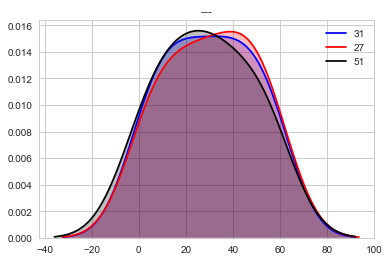

In [9]:
fig = plt.figure(figsize=(6,4),)
ax=sns.kdeplot(df.loc[(df['Номер троллейбуса'] == 31), 'TimeSplit'] , color='b', shade=True,label='31')
ax=sns.kdeplot(df.loc[(df['Номер троллейбуса'] == 27), 'TimeSplit'] , color='r', shade=True,label='27')
ax=sns.kdeplot(df.loc[(df['Номер троллейбуса'] == 51), 'TimeSplit'] , color='black', shade=True,label='51')
plt.title('---')

>ВИДИМ ЧТО РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПАССАЖИРОВ ОЖИДАЮЩИХ ТРОЛЛЕЙБУС ДЛЯ **МАРШРУТА 27** СМЕЩЕНО ВПРАВО, ЗА СЧЕТ ТОГО, ЧТО С ПОСЛЕДНЮЮ ДЕСЯТИМИНУТКУ НАБЛЮДАЕТСЯ **УВЕЛИЧЕНИЕ** КОЛИЧЕСТВА ПАССАЖИРОВ ОЖИДАЮЩИХ АВТОБУС **МАРШРУТА 27**

In [10]:
df_31 = df[c1]
df_51 = df[c2]
df_27 = df[c3]

>Введем вспомогательную переменную, предположим, что время ожидания автобуса с момента последнего автобуса коррелирует с падением количества людей, ожидающих автобус.

>**Проверим** корреляцию данных признаков.

>Для этого создадим вспомогательный датасет и заджойним его. Добавив новые признаки **TimeDiff** - время ожидания с момента отъезда последнего автобуса. 

>**PeopleDiff** - процентное падение пассажиропотока с момента отъезда последнего автобуса.

In [11]:
df_31 = df_31.reset_index()
df_31['New_ID'] = df_31.index+1
df_31['New_ID_tmp'] = df_31['New_ID']+1
a_31 = df_31[['Номер троллейбуса','TimeSplit','Количество человек','New_ID']].merge(df_31[['Номер троллейбуса','TimeSplit','Количество человек','New_ID_tmp']], left_on = 'New_ID', right_on='New_ID_tmp', how='left')
a_31 = a_31.fillna(0)
a_31['TimeDiff'] = a_31['TimeSplit_x'] - a_31['TimeSplit_y']
a_31['PeopleDiff'] = (a_31['Количество человек_x'] - a_31['Количество человек_y'])/a_31['Количество человек_y']
a_31 = a_31.iloc[1:]
print('Корреляция между временем ожидания автобуса и количеством пассажиров для 31 маршрута =', a_31['TimeDiff'].corr(a_31['PeopleDiff']))

Корреляция между временем ожидания автобуса и количеством пассажиров для 31 маршрута = 0.0258646857832


> Явной корреляции нет

In [13]:
df_27 = df_27.reset_index()
df_27['New_ID'] = df_27.index+1
df_27['New_ID_tmp'] = df_27['New_ID']+1
a_27 = df_27[['Номер троллейбуса','TimeSplit','Количество человек','New_ID']].merge(df_27[['Номер троллейбуса','TimeSplit','Количество человек','New_ID_tmp']], left_on = 'New_ID', right_on='New_ID_tmp', how='left')
a_27 = a_27.fillna(0)
a_27['TimeDiff'] = a_27['TimeSplit_x'] - a_27['TimeSplit_y']
a_27['PeopleDiff'] = (a_27['Количество человек_x'] - a_27['Количество человек_y'])/a_27['Количество человек_y']
a_27 = a_27.iloc[1:]
print('Корреляция между временем ожидания автобуса и количеством пассажиров для 27 маршрута =', a_27['TimeDiff'].corr(a_27['PeopleDiff']))

Корреляция между временем ожидания автобуса и количеством пассажиров для 27 маршрута = -0.0869011178712


> Явной корреляции нет

In [15]:
df_51 = df_51.reset_index()
df_51['New_ID'] = df_51.index+1
df_51['New_ID_tmp'] = df_51['New_ID']+1
a_51 = df_51[['Номер троллейбуса','TimeSplit','Количество человек','New_ID']].merge(df_51[['Номер троллейбуса','TimeSplit','Количество человек','New_ID_tmp']], left_on = 'New_ID', right_on='New_ID_tmp', how='left')
a_51 = a_51.fillna(0)
a_51['TimeDiff'] = a_51['TimeSplit_x'] - a_51['TimeSplit_y']
a_51['PeopleDiff'] = (a_51['Количество человек_x'] - a_51['Количество человек_y'])/a_51['Количество человек_y']
a_51 = a_51.iloc[1:]
print('Корреляция между временем ожидания автобуса и количеством пассажиров для 51 маршрута =', a_51['TimeDiff'].corr(a_51['PeopleDiff']))
a_51

Корреляция между временем ожидания автобуса и количеством пассажиров для 51 маршрута = 0.903140293438


,Номер троллейбуса_x,TimeSplit_x,Количество человек_x,New_ID,Номер троллейбуса_y,TimeSplit_y,Количество человек_y,New_ID_tmp,TimeDiff,PeopleDiff
1,51,7,19,2,51.0,0.0,20.0,2.0,7.0,-0.050000
2,51,14,18,3,51.0,7.0,19.0,3.0,7.0,-0.052632
3,51,22,15,4,51.0,14.0,18.0,4.0,8.0,-0.166667
4,51,28,16,5,51.0,22.0,15.0,5.0,6.0,0.066667
5,51,34,12,6,51.0,28.0,16.0,6.0,6.0,-0.250000
6,51,42,11,7,51.0,34.0,12.0,7.0,8.0,-0.083333
7,51,53,19,8,51.0,42.0,11.0,8.0,11.0,0.727273
8,51,56,5,9,51.0,53.0,19.0,9.0,3.0,-0.736842


>Высокая корреляция

In [16]:
print('Средняя дистанция между автобусами для 31 маршрута =', a_31.TimeDiff.mean())
print('Средняя дистанция между автобусами для 51 маршрута =', a_51.TimeDiff.mean())
print('Средняя дистанция между автобусами для 27 маршрута =', a_27.TimeDiff.mean())

Средняя дистанция между автобусами для 31 маршрута = 4.0
Средняя дистанция между автобусами для 51 маршрута = 7.0
Средняя дистанция между автобусами для 27 маршрута = 4.91666666667


In [17]:
print('Средний разброс между автобусами для 31 маршрута =', a_31.TimeDiff.std())
print('Средний разброс между автобусами для 51 маршрута =', a_51.TimeDiff.std())
print('Средний разброс между автобусами для 27 маршрута =', a_27.TimeDiff.std())

Средний разброс между автобусами для 31 маршрута = 0.925820099773
Средний разброс между автобусами для 51 маршрута = 2.26778683806
Средний разброс между автобусами для 27 маршрута = 0.792961461099


# Выводы

> Анализ показал, мы имеем следующую картину. В моменты пиковой нагрузки, в первые 10 минут наблюдений наблюдается большой пассажиропоток. Который почти в **3-4** раза выше чем в последние **20 минут**. Причем пиковая нагрузка на 27 маршрут приходится на последнюю двадцатиминутку. Недовольство скорее всего обусловлено тем, что в первые **20 минут** наблюдений частота появления автобусов такая же как и и в 20 минут, а пассажиропоток в первые **20** минут выше **в 4 раза**. Т.е. в моменты пиковой нагрузки, автобусы нужно отправлять банально чаще. 

>Помимо этого требуется увеличть частоту **51** маршрута, т.к. среднее время ожидания автобуса почти на **70-80%** выше, чем у маршрутов **27** и **31**.